In [1]:
import numpy as np, pandas
from matplotlib import pyplot as plt
from astropy.io import fits
from astroquery.gaia import Gaia 
from pyia import GaiaData
from astropy.table import Table
%matplotlib inline

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
#Name of Kinematic data file, and file with matched photometry. Have confirmed that 
#source id's once sorted are identical
kine_file = 'data/GaiaDR2_vrad_vel.fits'
phot_file = 'data/GaiaDR2_vrad_vel_phot.fits'

In [26]:
#Query to access stars with 6D kinematics is
"""SELECT phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
    FROM gaiadr2.gaia_source as gdr2
    WHERE rv_nb_transits > 0 AND
      astrometric_params_solved = 31"""

'SELECT phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag\n    FROM gaiadr2.gaia_source as gdr2\n    WHERE rv_nb_transits > 0 AND\n      astrometric_params_solved = 31'

In [12]:
#read fits tables into pandas dataframes, problem with Kinematic file for... reasons?
#Having to do with big-endianess? this foe is beyond any of me. run.
with fits.open(kine_file) as kf:
    k_df = pandas.DataFrame(np.array(kf[1].data).byteswap().newbyteorder())

In [19]:
with fits.open(phot_file) as pf:
    p_df = pandas.DataFrame(np.array(pf[1].data).byteswap().newbyteorder())

In [21]:
merge_df = k_df.merge(p_df,on='source_id')

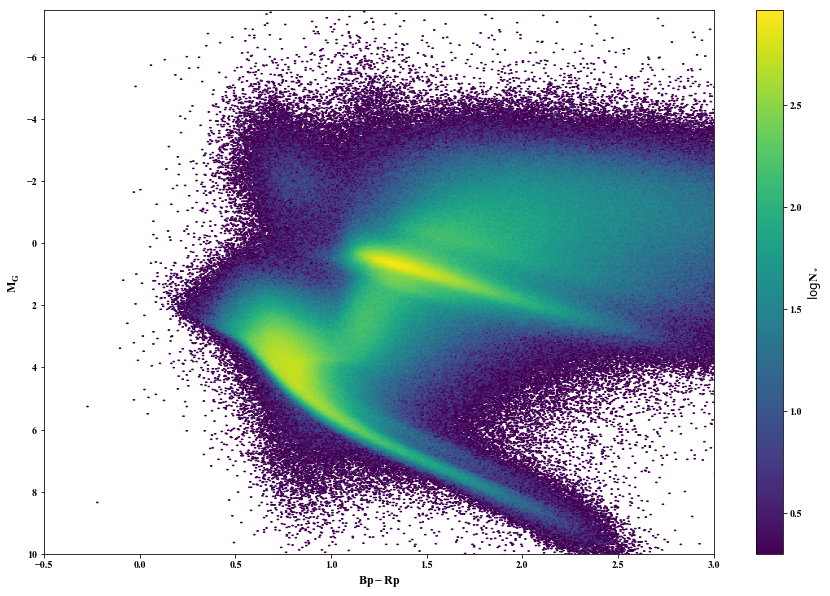

In [31]:
plt.figure(figsize=(15,10))
plt.hexbin(merge_df['phot_bp_mean_mag']-merge_df['phot_rp_mean_mag'],
          merge_df['phot_g_mean_mag'] - 5.0*np.log10(merge_df['dist']) + 5.0,
          mincnt = 1, bins = 'log', gridsize = 1000)
plt.xlabel(r'$Bp - Rp$')
plt.ylabel(r'$M_G$')
plt.xlim(-0.5,3)
plt.ylim(10,-7.5)
plt.colorbar(label=r'$\log N_*$')
plt.savefig('CMD_kinematics.png')

In [ ]:
"""THIS TAKES A REALLY LONG TIME BUT FOR FUTURE REFERENCE: THE PYIA SYNTAX TO SELECT A 
SET OF COLUMNS (in this example, G, Bp, Rp) GIVEN A PYTHON LIST OF SOURCE_IDs IS:
"""

q_str = "Select phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag \
    FROM gaiadr2.gaia_source as gdr2 \
    WHERE gdr2.source_id IN ("
for sid in source_ids
    q_str += str(sid) +','
q_str = q_str[:-1]
q_str += ')'
foo = GaiaData.from_query(q_str)